# Neural Networks: Theory and Implementation

Group Members:

Name: `Sayeh Jarollahi` \
Student ID (matriculation number): `XXX` \
Email: `sajaXXXX@stud.uni-saarland.de` 

Name: `Mahsa Amani` \
Student ID (matriculation number): `7064006` \
Email: `maam00002@stud.uni-saarland.de`

## Exercise 1

In [7]:
import numpy as np

def random_data_generator(n=100):
    # Generating two clusters of 100 random X 
    cluster1 = np.random.randn(n, 2)  # Cluster 1
    cluster2 = np.random.randn(n, 2)  # Cluster 2

    # Shifting the mean of each cluster
    cluster1 += np.array([-2, -2])
    cluster2 += np.array([2, 2])

    # Assigning classes
    class1 = -np.ones((n, 1))  # Class -1 for cluster 1
    class2 = np.ones((n, 1))   # Class 1 for cluster 2 

    # Combining clusters and classes
    X = np.vstack((cluster1, cluster2))
    y = np.vstack((class1, class2))

    # Shuffling the clusters and classes
    indices = np.random.permutation(2 * n)
    X = X[indices]
    y = y[indices]

    return X, y

In [31]:
def xor_data_generator():
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

    # computing each point class as (x XOR y)
    y = np.logical_xor(X[:, 0], X[:, 1]).astype(int)
    # replacing 0 label with -1 label
    y = np.where(y == 0, -1, y)
    # reshaping for having a vertical array
    y = y.reshape(-1, 1)

    return X, y

In [26]:
import matplotlib.pyplot as plt

def cluster_visualization(X, y, title=""):
    # Separating points based on their classes
    X1 = X[y[:, 0] == 1] # for class == 1
    X2 = X[y[:, 0] == -1] # for class == -1

    # plot
    plt.plot(X1[:, 0], X1[:, 1], 'ro', label="Class 1")  # red for class 1
    plt.plot(X2[:, 0], X2[:, 1], 'bo', label="Class -1")  # blue for class -1
    plt.title(f'Cluster Visualization of {title} dataset')
    plt.legend()
    plt.show()

In [51]:
seed = 42
np.random.seed(seed)

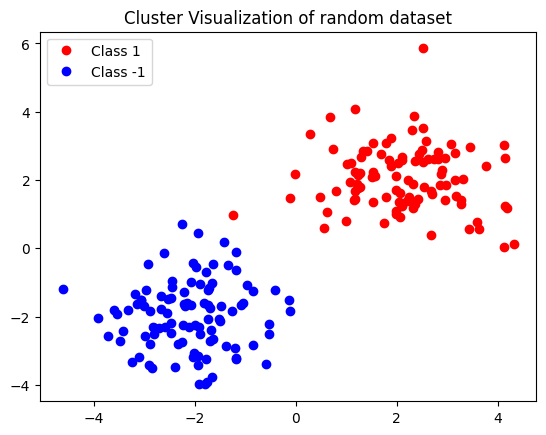

In [27]:
X, y = random_data_generator()
cluster_visualization(X, y, title="random")

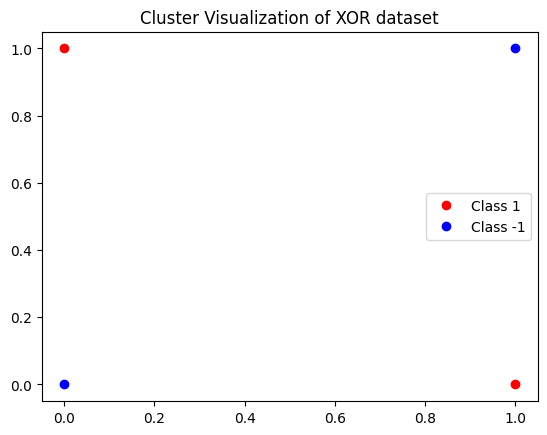

In [33]:
X, y = xor_data_generator()
cluster_visualization(X, y, title="XOR")

## Exercise 2

In [53]:
from sklearn.svm import LinearSVC

def linear_decision_boundary_finder(X, y, max_iter=1000, C=1.0):
    svm_model = LinearSVC(random_state=seed, max_iter=max_iter, C=C)

    # Fitting the model to the points and their classes
    svm_model.fit(X, y.flatten())

    # SVM model coefficients and intercept
    coef = svm_model.coef_[0]
    intercept = svm_model.intercept_[0]

    return coef, intercept


In [44]:
def decision_boundary_visualization(X, y, coef, intercept, title=""):
    # Separating points based on their classes
    X1 = X[y[:, 0] == 1] # for class == 1
    X2 = X[y[:, 0] == -1] # for class == -1

    # Plot the points
    plt.plot(X1[:, 0], X1[:, 1], 'ro', label="Class 1")  # red for class 1
    plt.plot(X2[:, 0], X2[:, 1], 'bo', label="Class -1")  # blue for class -1

    # Create a meshgrid to plot decision regions
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

    # Calculate class of each point in the meshgrid
    Z = coef[0] * xx + coef[1] * yy + intercept
    Z = np.sign(Z)  
    
    # Plot decision regions
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

    plt.title(f'Decision Boundary Visualization of {title} dataset')
    plt.legend()
    plt.show()


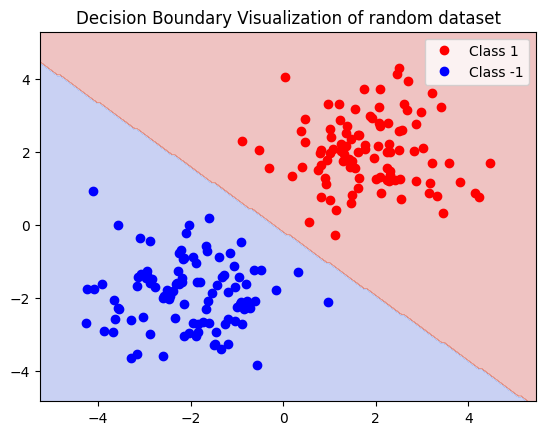

In [55]:
X, y = random_data_generator()
coef, intercept = linear_decision_boundary_finder(X, y)
decision_boundary_visualization(X, y, coef, intercept, "random")

This already performs good in seperating the 2 classes, so we optimize the model trained over XOR dataset.

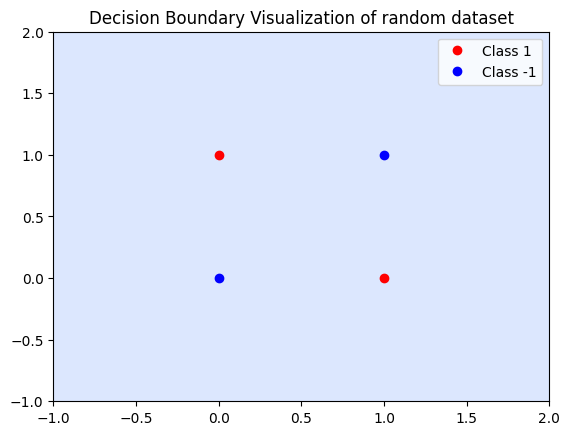

In [58]:
X, y = xor_data_generator()
coef, intercept = linear_decision_boundary_finder(X, y)
decision_boundary_visualization(X, y, coef, intercept, "random")

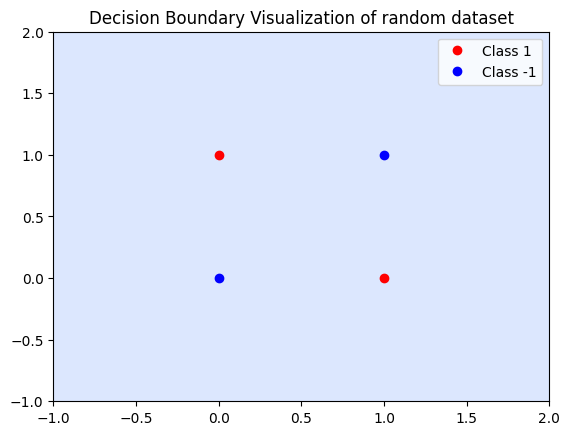

In [59]:
coef, intercept = linear_decision_boundary_finder(X, y, max_iter=10000)
decision_boundary_visualization(X, y, coef, intercept, "random")

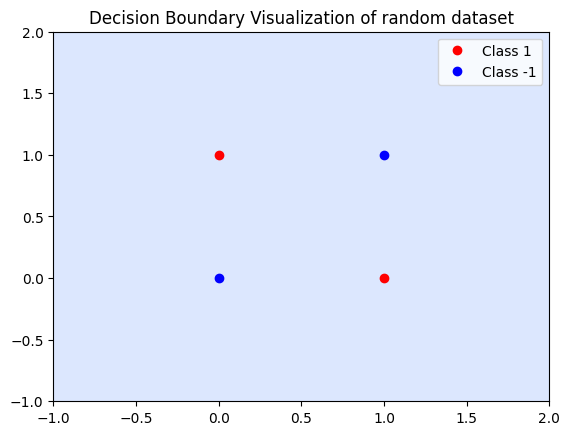

In [60]:
coef, intercept = linear_decision_boundary_finder(X, y, max_iter=10000, C=2.0)
decision_boundary_visualization(X, y, coef, intercept, "random")

As the data cannot be seperated by a line and there is no linear model capable of seperating these 4 points, so we stop trying out more settings.
Reference: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

## Exercise 3